### Importing the libraries we need.

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
final_table = pd.read_csv('../cleanedData')

In [69]:
final_table

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,genres,popularity,vote_average,vote_count
0,7,51,2011-10-21,paranormalactivity3,5000000,"$104,028,807",207039844,4140.796880,2011,tt1778304,83.0,"Horror,Mystery,Thriller",9.669,5.9,1197
1,8,84,2014-10-03,annabelle,6500000,"$84,273,813",256862920,3951.737231,2014,tt3322940,99.0,"Horror,Mystery,Thriller",13.989,5.6,3357
2,9,15,2010-08-27,thelastexorcism,1800000,"$41,034,350",70165900,3898.105556,2010,tt1320244,87.0,"Drama,Horror,Thriller",9.350,5.6,519
3,10,67,2013-06-07,thepurge,3000000,"$64,473,115",91266581,3042.219367,2013,tt2184339,85.0,"Horror,Thriller",24.364,6.2,4797
4,11,55,2016-07-22,lightsout,5000000,"$67,268,835",148806510,2976.130200,2016,tt4786282,81.0,"Drama,Horror,Mystery",12.408,6.3,2220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,1462,79,2012-11-02,vamps,16000000,"$3,361",94812,0.592575,2012,tt1545106,92.0,"Comedy,Horror,Romance",6.650,5.0,145
1262,1463,19,2010-06-30,loveranch,25000000,"$137,885",146149,0.584596,2010,tt1125929,117.0,"Biography,Comedy,Drama",6.185,6.1,28
1263,1467,51,2014-11-14,wolves,18000000,$0,94953,0.527517,2014,tt1403241,91.0,"Action,Fantasy,Horror",8.627,5.8,151
1264,1468,55,2015-03-17,accidentallove,26000000,$0,135436,0.520908,2015,tt1137470,100.0,"Comedy,Romance",6.487,4.0,172


In [40]:
final_table_genres = final_table.copy()
final_table_genres['genres'] = final_table_genres['genres'].str.split(",")
final_table_genres = final_table_genres.explode('genres')
final_table_genres

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,genres,popularity,vote_average,vote_count
7,51,2011-10-21,paranormalactivity3,5000000,"$104,028,807",207039844,4140.796880,2011,tt1778304,83.0,Horror,9.669,5.9,1197
7,51,2011-10-21,paranormalactivity3,5000000,"$104,028,807",207039844,4140.796880,2011,tt1778304,83.0,Mystery,9.669,5.9,1197
7,51,2011-10-21,paranormalactivity3,5000000,"$104,028,807",207039844,4140.796880,2011,tt1778304,83.0,Thriller,9.669,5.9,1197
8,84,2014-10-03,annabelle,6500000,"$84,273,813",256862920,3951.737231,2014,tt3322940,99.0,Horror,13.989,5.6,3357
8,84,2014-10-03,annabelle,6500000,"$84,273,813",256862920,3951.737231,2014,tt3322940,99.0,Mystery,13.989,5.6,3357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,55,2015-03-17,accidentallove,26000000,$0,135436,0.520908,2015,tt1137470,100.0,Comedy,6.487,4.0,172
1468,55,2015-03-17,accidentallove,26000000,$0,135436,0.520908,2015,tt1137470,100.0,Romance,6.487,4.0,172
1477,83,2015-10-30,freaksofnature,33000000,"$70,958",70958,0.215024,2015,tt1817771,92.0,Comedy,9.310,5.8,231
1477,83,2015-10-30,freaksofnature,33000000,"$70,958",70958,0.215024,2015,tt1817771,92.0,Horror,9.310,5.8,231


In [41]:
final_table_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3315 entries, 7 to 1477
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 3315 non-null   int64         
 1   release_date       3315 non-null   datetime64[ns]
 2   movie              3315 non-null   object        
 3   production_budget  3315 non-null   int64         
 4   domestic_gross     3315 non-null   object        
 5   worldwide_gross    3315 non-null   int64         
 6   ROI                3315 non-null   float64       
 7   start_year         3315 non-null   int64         
 8   movie_id           3315 non-null   object        
 9   runtime_minutes    3315 non-null   float64       
 10  genres             3315 non-null   object        
 11  popularity         3315 non-null   float64       
 12  vote_average       3315 non-null   float64       
 13  vote_count         3315 non-null   int64         
dtypes: datet

In [42]:
final_table_genres.describe()

,id,production_budget,worldwide_gross,ROI,start_year,runtime_minutes,popularity,vote_average,vote_count
count,3315.000000,3.315000e+03,3.315000e+03,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000
mean,50.748416,5.401966e+07,1.741834e+08,358.378421,2013.814480,109.488989,14.300364,6.359578,2507.392459
std,28.447127,5.921720e+07,2.551378e+08,436.968874,2.562373,16.591659,8.168129,0.781385,3056.385936
min,1.000000,5.000000e+04,5.969600e+04,0.215024,2010.000000,79.000000,0.600000,2.600000,2.000000
25%,26.000000,1.300000e+07,2.219740e+07,119.499087,2012.000000,97.000000,9.064000,5.900000,528.500000
50%,51.000000,3.100000e+07,7.589810e+07,241.125083,2014.000000,107.000000,12.389000,6.300000,1337.000000
75%,75.000000,7.000000e+07,2.094614e+08,422.261705,2016.000000,119.000000,16.982000,6.900000,3330.000000
max,100.000000,4.106000e+08,2.048134e+09,4140.796880,2018.000000,180.000000,80.773000,8.400000,22186.000000


### Need to get a table that counts up total movies per genre.

In [43]:
f_t_count = final_table_genres.groupby('genres').count().sort_values(by='id',ascending=False)
f_t_count

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,popularity,vote_average,vote_count
genres,,,,,,,,,,,,,
Drama,620,620,620,620,620,620,620,620,620,620,620,620,620
Comedy,457,457,457,457,457,457,457,457,457,457,457,457,457
Action,395,395,395,395,395,395,395,395,395,395,395,395,395
Adventure,326,326,326,326,326,326,326,326,326,326,326,326,326
Crime,212,212,212,212,212,212,212,212,212,212,212,212,212
Thriller,212,212,212,212,212,212,212,212,212,212,212,212,212
Romance,174,174,174,174,174,174,174,174,174,174,174,174,174
Horror,135,135,135,135,135,135,135,135,135,135,135,135,135
Biography,120,120,120,120,120,120,120,120,120,120,120,120,120


## We are only going to look at the genres that have at least 50 movies in the genre to make sure we have enough data points to not easily skew the data with a few outliers.

In [44]:
f_t_count = f_t_count.loc[f_t_count['id'] > 50]
f_t_count

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,popularity,vote_average,vote_count
genres,,,,,,,,,,,,,
Drama,620,620,620,620,620,620,620,620,620,620,620,620,620
Comedy,457,457,457,457,457,457,457,457,457,457,457,457,457
Action,395,395,395,395,395,395,395,395,395,395,395,395,395
Adventure,326,326,326,326,326,326,326,326,326,326,326,326,326
Crime,212,212,212,212,212,212,212,212,212,212,212,212,212
Thriller,212,212,212,212,212,212,212,212,212,212,212,212,212
Romance,174,174,174,174,174,174,174,174,174,174,174,174,174
Horror,135,135,135,135,135,135,135,135,135,135,135,135,135
Biography,120,120,120,120,120,120,120,120,120,120,120,120,120


In [45]:
f_t_genres = list(f_t_count.index)
f_t_num = list(f_t_count['id'].values)

### The above code is to get lists of the genres, and of the number of movies.

In [46]:
f_t_genres

['Drama',
 'Comedy',
 'Action',
 'Adventure',
 'Crime',
 'Thriller',
 'Romance',
 'Horror',
 'Biography',
 'Sci-Fi',
 'Fantasy',
 'Mystery',
 'Animation',
 'Family']

In [47]:
f_t_num

[620, 457, 395, 326, 212, 212, 174, 135, 120, 118, 113, 104, 94, 84]

In [48]:
f_t_genres

['Drama',
 'Comedy',
 'Action',
 'Adventure',
 'Crime',
 'Thriller',
 'Romance',
 'Horror',
 'Biography',
 'Sci-Fi',
 'Fantasy',
 'Mystery',
 'Animation',
 'Family']

In [49]:
f_t_num

[620, 457, 395, 326, 212, 212, 174, 135, 120, 118, 113, 104, 94, 84]

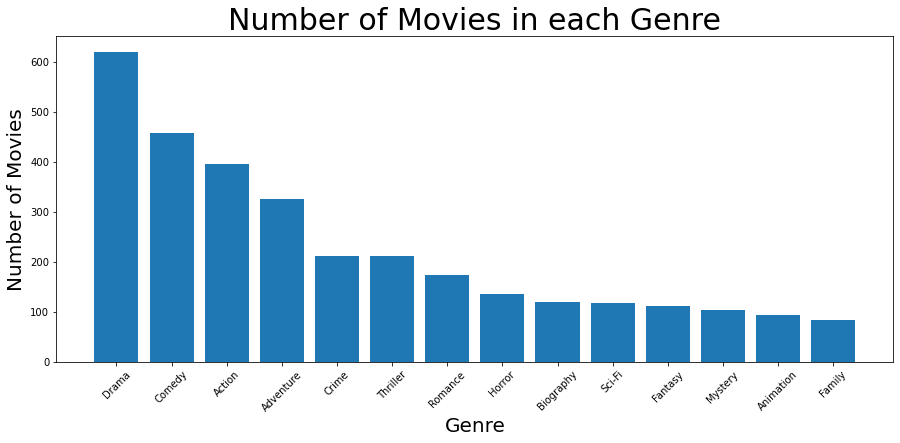

In [50]:
fig, ax = plt.subplots(figsize = (15,6))
ax.bar(x=f_t_genres,height=f_t_num)
plt.xticks(rotation=45)
plt.title('Number of Movies in each Genre', fontsize = 30)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Number of Movies', fontsize = 20);

In [51]:
f_t_count_in_order = final_table_genres.groupby('genres').count()
f_t_count_in_order = f_t_count_in_order.loc[f_t_count_in_order['id'] > 50]
f_t_count_in_order

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,popularity,vote_average,vote_count
genres,,,,,,,,,,,,,
Action,395,395,395,395,395,395,395,395,395,395,395,395,395
Adventure,326,326,326,326,326,326,326,326,326,326,326,326,326
Animation,94,94,94,94,94,94,94,94,94,94,94,94,94
Biography,120,120,120,120,120,120,120,120,120,120,120,120,120
Comedy,457,457,457,457,457,457,457,457,457,457,457,457,457
Crime,212,212,212,212,212,212,212,212,212,212,212,212,212
Drama,620,620,620,620,620,620,620,620,620,620,620,620,620
Family,84,84,84,84,84,84,84,84,84,84,84,84,84
Fantasy,113,113,113,113,113,113,113,113,113,113,113,113,113


In [52]:
num_of_movies_per_genre = list(f_t_count_in_order['id'].values)
num_of_movies_per_genre

[395, 326, 94, 120, 457, 212, 620, 84, 113, 135, 104, 174, 118, 212]

In [53]:
roi_genre_order_table = final_table_genres.groupby('genres').sum()
roi_genre_order_table = roi_genre_order_table.loc[(roi_genre_order_table.index == 'Drama') | 
                          (roi_genre_order_table.index == 'Comedy') |
                         (roi_genre_order_table.index == 'Action') |
                         (roi_genre_order_table.index == 'Adventure') |
                         (roi_genre_order_table.index == 'Thriller') |
                         (roi_genre_order_table.index == 'Crime') |
                         (roi_genre_order_table.index == 'Romance') |
                         (roi_genre_order_table.index == 'Horror') |
                         (roi_genre_order_table.index == 'Biography') |
                         (roi_genre_order_table.index == 'Sci-Fi') |
                         (roi_genre_order_table.index == 'Fantasy') |
                         (roi_genre_order_table.index == 'Mystery') |
                         (roi_genre_order_table.index == 'Animation') |
                         (roi_genre_order_table.index == 'Family')]

In [54]:
roi_genre_order_table

,id,production_budget,worldwide_gross,ROI,start_year,runtime_minutes,popularity,vote_average,vote_count
genres,,,,,,,,,
Action,20035,33970900000,104384601134,109729.039619,795490,44675.0,7043.824,2473.1,1443653
Adventure,15586,35693000000,119656362813,104978.987177,656577,36414.0,6072.932,2075.4,1375930
Animation,4210,9560000000,37789331264,36983.840251,189329,8977.0,1553.274,614.3,291399
Biography,6134,3273270000,10204442637,41311.307667,241762,14294.0,1482.667,829.4,215118
Comedy,22750,20243150000,68215823682,154607.680162,920214,46990.0,5775.470,2851.5,856361
Crime,10479,7339820000,18952840831,49357.982989,426949,23308.0,2888.528,1338.2,399559
Drama,31730,18416642650,51346040737,211365.665877,1248556,69834.0,7478.838,4065.2,1096946
Family,4434,5877900000,17290057931,23867.482186,169106,8881.0,1117.280,520.8,172765
Fantasy,5787,10107650000,28665014243,37331.751939,227547,12597.0,1929.996,691.7,379539


In [55]:
list_of_total_roi_per_genre = list(roi_genre_order_table['ROI'].values)
list_of_total_roi_per_genre

[109729.03961852106,
 104978.98717698822,
 36983.84025090016,
 41311.307666989844,
 154607.6801616492,
 49357.982988940006,
 211365.66587697229,
 23867.48218634462,
 37331.75193867503,
 88749.57523165588,
 66284.54094313303,
 66430.0634841919,
 46290.00187600587,
 105331.86481982713]

In [56]:
avg_roi_per_genre = [i / j for i, j in zip(list_of_total_roi_per_genre, num_of_movies_per_genre)]
avg_roi_per_genre

[277.79503700891405,
 322.02143305824603,
 393.4451090521294,
 344.26089722491537,
 338.31002223555623,
 232.8206744761321,
 340.9123643176972,
 284.1366926945788,
 330.36948618296486,
 657.4042609752287,
 637.351355222433,
 381.78197404707987,
 392.28815149157515,
 496.8484189614487]

In [57]:
genres_Alpha_order = list(roi_genre_order_table.index)
genres_Alpha_order

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Horror',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller']

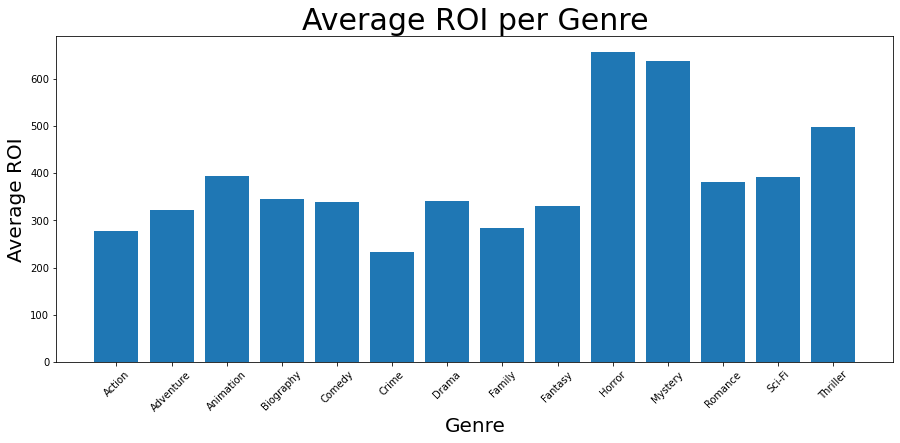

In [58]:
fig, ax = plt.subplots(figsize = (15,6))
ax.bar(x=genres_Alpha_order,height=avg_roi_per_genre)
plt.title('Average ROI per Genre', fontsize = 30)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Average ROI', fontsize = 20)
plt.xticks(rotation=45);

In [59]:
final_table_genres.loc[final_table_genres['genres'] == 'Horror'].describe()

,id,production_budget,worldwide_gross,ROI,start_year,runtime_minutes,popularity,vote_average,vote_count
count,135.000000,1.350000e+02,1.350000e+02,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,51.333333,2.254407e+07,8.149852e+07,657.404261,2014.133333,99.081481,12.419156,5.799259,1619.622222
std,27.627317,3.144536e+07,1.063753e+08,884.366697,2.605391,12.302197,5.395764,0.717219,1658.756101
min,1.000000,6.500000e+05,7.095800e+04,0.215024,2010.000000,80.000000,0.667000,3.600000,23.000000
25%,28.000000,5.000000e+06,1.472403e+07,104.186527,2012.000000,91.000000,8.971500,5.300000,560.000000
50%,54.000000,1.060000e+07,5.172364e+07,297.489166,2014.000000,96.000000,11.302000,5.900000,1061.000000
75%,74.500000,2.700000e+07,9.980374e+07,773.389970,2016.000000,106.000000,14.468000,6.200000,2120.500000
max,100.000000,1.900000e+08,6.974580e+08,4140.796880,2018.000000,152.000000,31.397000,7.500000,10931.000000


In [60]:
final_table_genres.describe()

,id,production_budget,worldwide_gross,ROI,start_year,runtime_minutes,popularity,vote_average,vote_count
count,3315.000000,3.315000e+03,3.315000e+03,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000
mean,50.748416,5.401966e+07,1.741834e+08,358.378421,2013.814480,109.488989,14.300364,6.359578,2507.392459
std,28.447127,5.921720e+07,2.551378e+08,436.968874,2.562373,16.591659,8.168129,0.781385,3056.385936
min,1.000000,5.000000e+04,5.969600e+04,0.215024,2010.000000,79.000000,0.600000,2.600000,2.000000
25%,26.000000,1.300000e+07,2.219740e+07,119.499087,2012.000000,97.000000,9.064000,5.900000,528.500000
50%,51.000000,3.100000e+07,7.589810e+07,241.125083,2014.000000,107.000000,12.389000,6.300000,1337.000000
75%,75.000000,7.000000e+07,2.094614e+08,422.261705,2016.000000,119.000000,16.982000,6.900000,3330.000000
max,100.000000,4.106000e+08,2.048134e+09,4140.796880,2018.000000,180.000000,80.773000,8.400000,22186.000000


In [61]:
list_of_total_worldwide_gross_per_genre = list(roi_genre_order_table['worldwide_gross'].values)
list_of_total_worldwide_gross_per_genre

[104384601134,
 119656362813,
 37789331264,
 10204442637,
 68215823682,
 18952840831,
 51346040737,
 17290057931,
 28665014243,
 11002300843,
 10548382224,
 13277093850,
 44150543604,
 28573182034]

In [62]:
list_of_total_production_budget_per_genre = list(roi_genre_order_table['production_budget'].values)
list_of_total_production_budget_per_genre

[33970900000,
 35693000000,
 9560000000,
 3273270000,
 20243150000,
 7339820000,
 18416642650,
 5877900000,
 10107650000,
 3043450000,
 2940187650,
 4220365000,
 11828075000,
 8137937650]

In [63]:
total_profit_per_genre = [i - j for i, j 
                    in zip(list_of_total_worldwide_gross_per_genre,list_of_total_production_budget_per_genre )]
avg_profit_per_genre = [i / j for i, j 
                    in zip(total_profit_per_genre,num_of_movies_per_genre )]

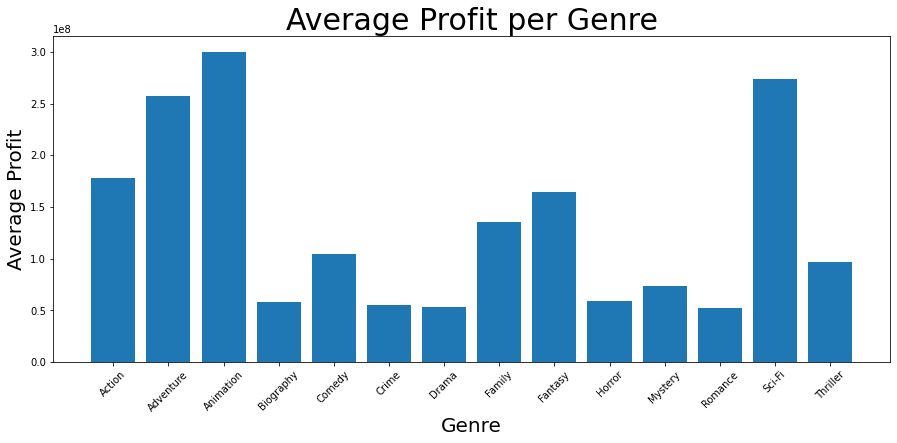

In [64]:
fig, ax = plt.subplots(figsize = (15,6))
ax.bar(x=genres_Alpha_order,height=avg_profit_per_genre)
plt.title('Average Profit per Genre', fontsize = 30)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Average Profit', fontsize = 20)
plt.xticks(rotation=45);